In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [2]:
path = '~/Desktop/database.csv'

In [3]:
plane_data = pd.read_csv(path, low_memory = False,
                         na_values=['UNKNOWN', 'UNK'],### Adds UNKNOWN and UNK to list of NULLs
                         na_filter=True,                         ### Detect NA/NaN as actual NULL values
                         skip_blank_lines=True)

In [4]:
plane_data.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


Text(0.5,1,'Birdstrikes per Year')

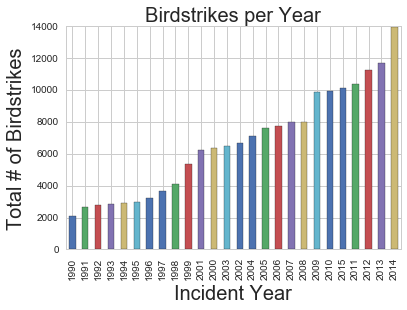

In [5]:
plane_data['Incident Year'].value_counts(ascending = True).plot.bar()
plt.xlabel("Incident Year", fontsize=20)
plt.ylabel("Total # of Birdstrikes", fontsize=20)
plt.title("Birdstrikes per Year", fontsize=20)





In [6]:
column_names = ['Record ID','Incident Year', 'Incident Month', 'Incident Day', 'Operator', 'Aircraft','Species Name','Warning Issued','Flight Phase']

plane_data = plane_data[column_names]
plane_data.head(2)

,Record ID,Incident Year,Incident Month,Incident Day,Operator,Aircraft,Species Name,Warning Issued,Flight Phase
0,127128,1990,1,1,DELTA AIR LINES,B-757-200,GULL,NaN,CLIMB
1,129779,1990,1,1,HAWAIIAN AIR,DC-9,HOUSE SPARROW,NaN,TAKEOFF RUN


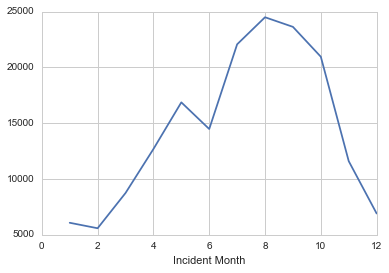

In [7]:
plane_data.groupby('Incident Month')['Record ID'].count().plot.line()


In [8]:
months_dict = {1:'Jan','1':'Jan', 2:'Feb', 3:'March',
               4:'April', 5:'May', 6:'June',
               7:'July',8:'August', 9: 'Sept',
               10:'Oct', 11:'Nov', 12:'Dec'}

In [9]:
plane_data['Incident Month'] = plane_data['Incident Month'].map(months_dict)
plane_data.head()



,Record ID,Incident Year,Incident Month,Incident Day,Operator,Aircraft,Species Name,Warning Issued,Flight Phase
0,127128,1990,Jan,1,DELTA AIR LINES,B-757-200,GULL,NaN,CLIMB
1,129779,1990,Jan,1,HAWAIIAN AIR,DC-9,HOUSE SPARROW,NaN,TAKEOFF RUN
2,129780,1990,Jan,2,NaN,NaN,BARN OWL,NaN,NaN
3,2258,1990,Jan,3,MILITARY,A-10A,UNKNOWN MEDIUM BIRD,NaN,APPROACH
4,2257,1990,Jan,3,MILITARY,F-16,FINCH,NaN,CLIMB


Text(0.5,1,'Birdstrikes per Month')

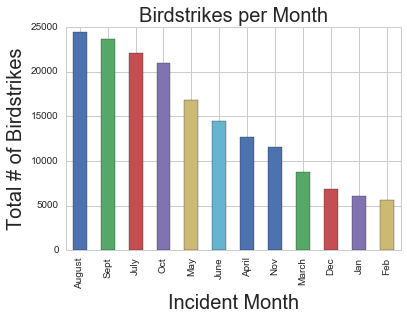

In [10]:
plane_data['Incident Month'].value_counts().plot.bar()
plt.xlabel("Incident Month", fontsize=20)
plt.ylabel("Total # of Birdstrikes", fontsize=20)
plt.title("Birdstrikes per Month", fontsize=20)

# Seems to be more birdstrikes in the warmer months. Possibly due to the migration of birds.


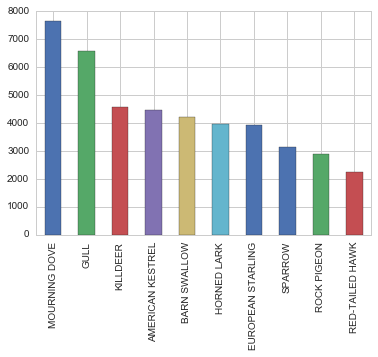

In [11]:
species_name = (     plane_data[~plane_data['Species Name']
            .isin(['UNKNOWN MEDIUM BIRD', 'UNKNOWN SMALL BIRD','UNKNOWN LARGE BIRD', 'UNKNOWN BIRD'])]    )
# Remove unknown bird species                             

species_name['Species Name'].value_counts().head(10).plot.bar()


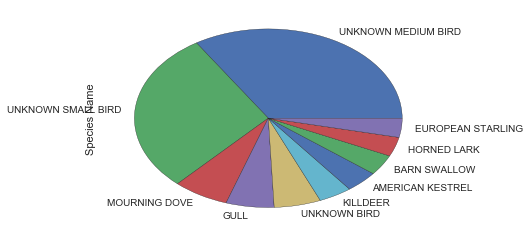

In [12]:
plane_data['Species Name'].value_counts(ascending = False).head(10).plot.pie() 
#Most Birds are unknown but relative size was predicted in the data

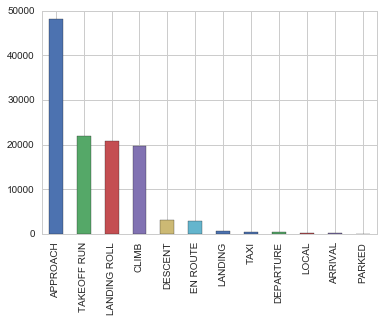

In [13]:
plane_data['Flight Phase'].value_counts().plot.bar() # most bird strikes are during takeoff, low altitudes, and landing

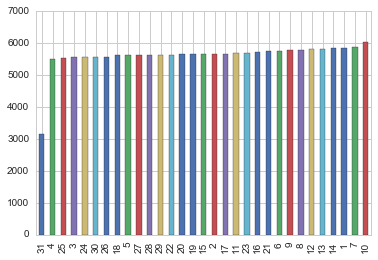

In [14]:
plane_data['Incident Day'].value_counts(ascending = True).plot.bar()


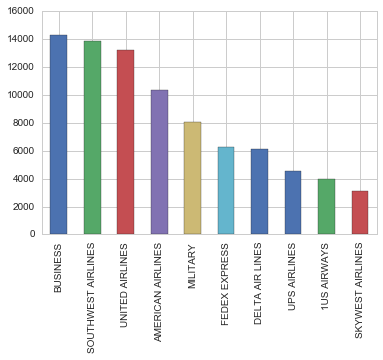

In [15]:
plane_data['Operator'].value_counts(ascending = False).head(10).plot.bar()


(array([0, 1]), <a list of 2 Text xticklabel objects>)

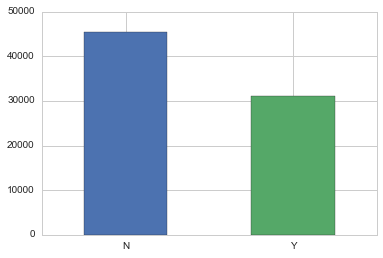

In [17]:
warning_column = plane_data[plane_data['Warning Issued'].isin(['y','n','Y','N'])] ['Warning Issued']
warning_column.map(lambda x: x.upper()).value_counts(ascending = False).head(10).plot.bar()
plt.xticks(rotation=360)



In [29]:
#plane_data.crosstab(plane_data['Species Name'], plane_data['Flight Phase'])
contTab = pd.crosstab(plane_data['Flight Phase'], plane_data['Operator'])
contTab


Operator,1US AIRWAYS,ABELAG AVIATION,ABSA AEROLINHAS BRASILEIRAS,ABX AIR,ACM AVIATION,ACTION AIRLINES,ADI SHUTTLE GROUP,AER LINGUS,AERO AIR,AERO CHARTER AND TRANSPORT,...,WINAIR,WINGS WEST,WORLD AIRWAYS,WORLD ATLANTIC AIRLINES,WORLDWIDE JET CHARTER,XIAMEN AIRLINES,XL AIRWAYS UK,XOJET,XTRA AIRWAYS,ZANTOP INTL AIRLINES
Flight Phase,,,,,,,,,,,,,,,,,,,,,
APPROACH,1454,1,1,462,0,5,8,9,1,0,...,0,10,1,1,2,1,0,14,9,1
ARRIVAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CLIMB,793,0,0,144,0,0,4,6,0,1,...,0,6,4,1,0,0,0,10,3,2
DEPARTURE,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DESCENT,114,0,0,52,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
EN ROUTE,17,0,0,207,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LANDING,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LANDING ROLL,580,0,1,92,1,1,5,8,1,0,...,2,6,4,0,2,0,1,6,2,0
LOCAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
contTab = contTab[contTab.loc[:, contTab.columns] > 0]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

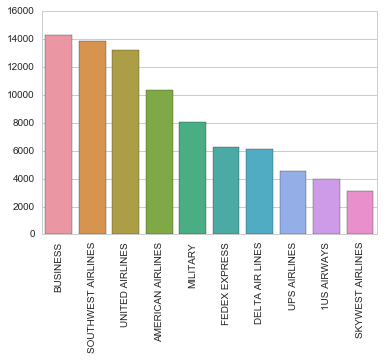

In [58]:
# Another Method of plotting using seaborn

# Get the numnber of occurances of each operator
operator_counts = plane_data.Operator.value_counts()

# Split and Save the Operator names in a variable
operators = operator_counts.index

# Split and Save the counts in another variable
counts = operator_counts.get_values()

barplot = sns.barplot(x=operators[:10], y=counts[:10])
barplot
plt.xticks(rotation=90)
